<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/Descriptive_analysis_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('adjusted_data.csv')

###descriptive statistics

In [ ]:
# group by Site and Area
grouped = df.groupby(['Site', 'Area'])

# Bacterial counts statistics
bc_stats = grouped[['BC-Enterococcus (CFU/100ml)',
                   'BC-Fecal Coliform(CFU/100ml)',
                   'BC-E-Coli (CFU/100ml)']].agg(['mean', 'median', 'std', lambda x: x.max() - x.min()])
bc_stats = bc_stats.rename(columns={'<lambda>': 'range'})

# Physical parameters statistics
pp_stats = grouped[['PP-PH', 'PP-Conductivity',
                   'PP-Salinity', 'PP-Temperature']].agg(['mean', 'median', 'std', lambda x: x.max() - x.min()])
pp_stats = pp_stats.rename(columns={'<lambda>': 'range'})

print("Bacterial Counts Statistics:")
print(bc_stats)
print("\nPhysical Parameters Statistics:")
print(pp_stats)

Bacterial Counts Statistics:
                 BC-Enterococcus (CFU/100ml)                                  \
                                        mean  median          std <lambda_0>   
Site   Area                                                                    
Site 1 Sand                           7560.0  8600.0  3171.820368       9000   
       Sea Water                      5415.0  5550.0  2475.216040       7900   
Site 2 Sand                           6070.0  6600.0  2762.064445       7900   
       Sea Water                      3945.0  3400.0  2081.459157       7000   
Site 3 Sand                           8025.0  9650.0  3701.595002      10950   
       Sea Water                      6095.0  7250.0  3011.501102       7700   

                 BC-Fecal Coliform(CFU/100ml)                        \
                                         mean   median          std   
Site   Area                                                           
Site 1 Sand                          

###Total Bacterial Counts (using mean values)

In [ ]:
# mean bacterial counts by area
area_mean = df.groupby('Area')[['BC-Enterococcus (CFU/100ml)',
                              'BC-Fecal Coliform(CFU/100ml)',
                              'BC-E-Coli (CFU/100ml)']].mean()

print("\nMean Bacterial Counts by Area:")
print(area_mean)


Mean Bacterial Counts by Area:
           BC-Enterococcus (CFU/100ml)  BC-Fecal Coliform(CFU/100ml)  \
Area                                                                   
Sand                       7218.333333                   7850.000000   
Sea Water                  5151.666667                   6613.333333   

           BC-E-Coli (CFU/100ml)  
Area                              
Sand                 5088.333333  
Sea Water            4373.333333  


##Visualizing Descriptive Analysis

###Bacterial counts by site and area (separate plots for each bacteria)

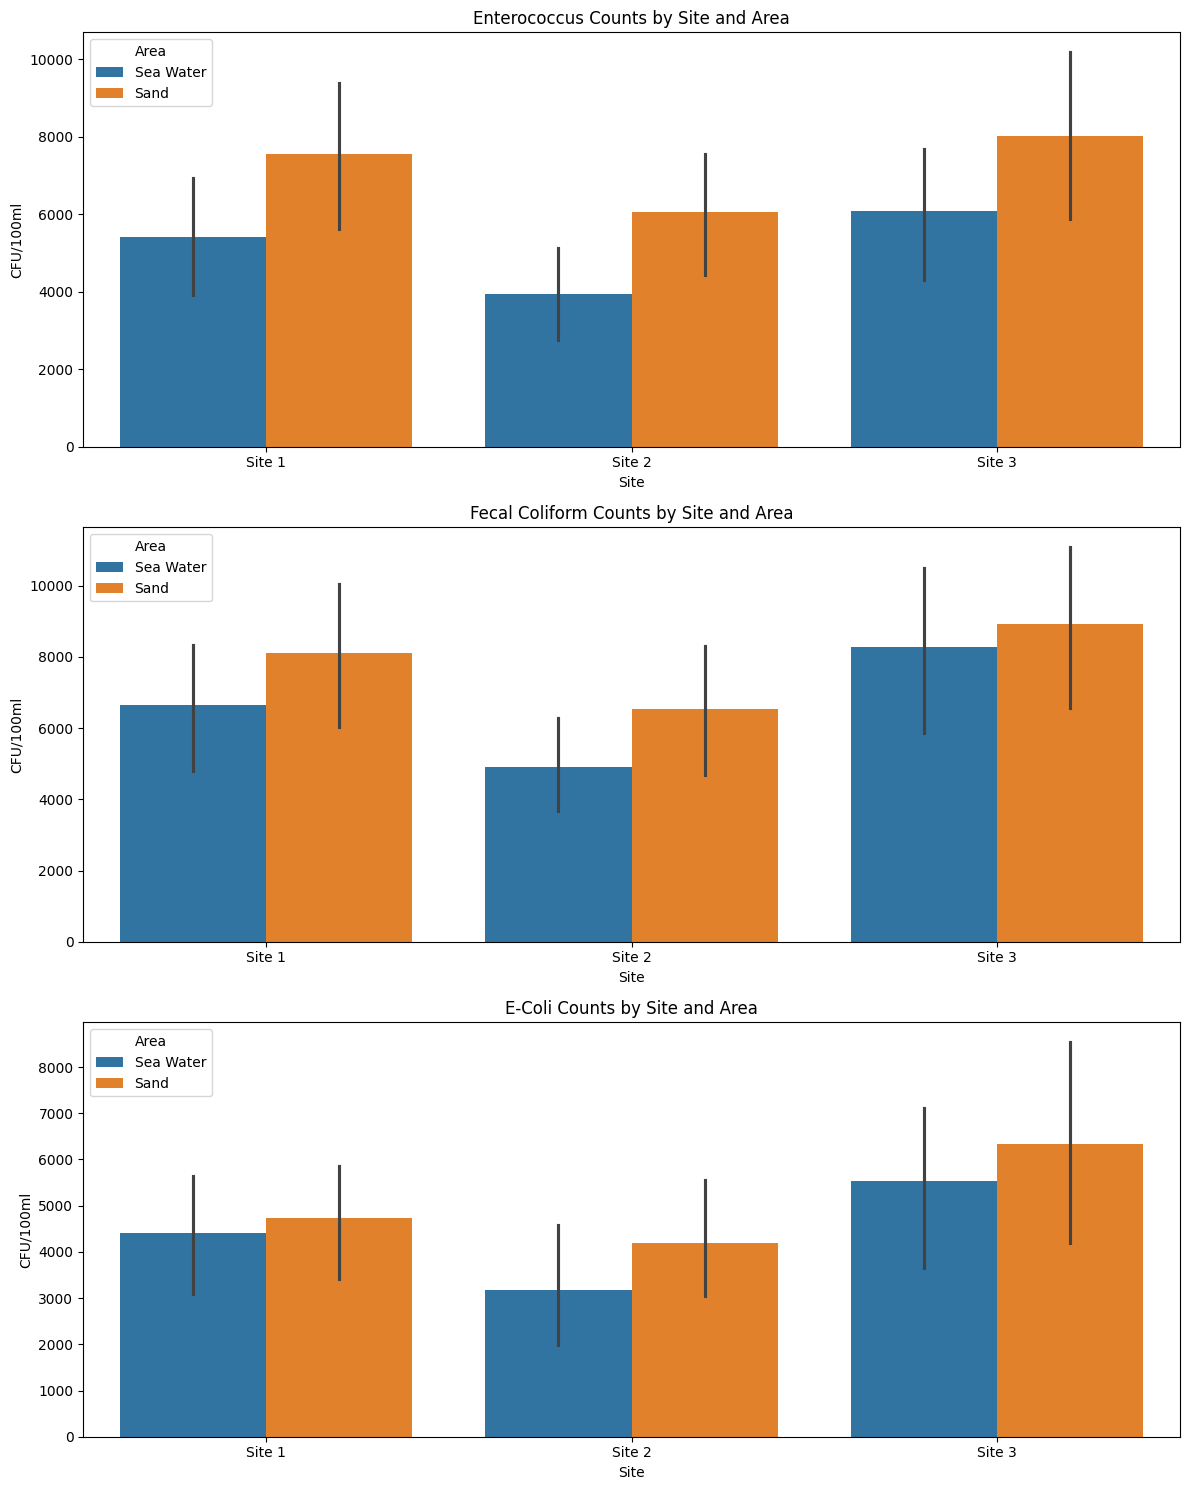

In [ ]:
# figure
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Enterococcus
sns.barplot(data=df, x='Site', y='BC-Enterococcus (CFU/100ml)', hue='Area', ax=axes[0])
axes[0].set_title('Enterococcus Counts by Site and Area')
axes[0].set_ylabel('CFU/100ml')

# Fecal Coliform
sns.barplot(data=df, x='Site', y='BC-Fecal Coliform(CFU/100ml)', hue='Area', ax=axes[1])
axes[1].set_title('Fecal Coliform Counts by Site and Area')
axes[1].set_ylabel('CFU/100ml')

# E-Coli
sns.barplot(data=df, x='Site', y='BC-E-Coli (CFU/100ml)', hue='Area', ax=axes[2])
axes[2].set_title('E-Coli Counts by Site and Area')
axes[2].set_ylabel('CFU/100ml')

plt.tight_layout()
plt.show()

###Total bacterial counts in sea water vs sand

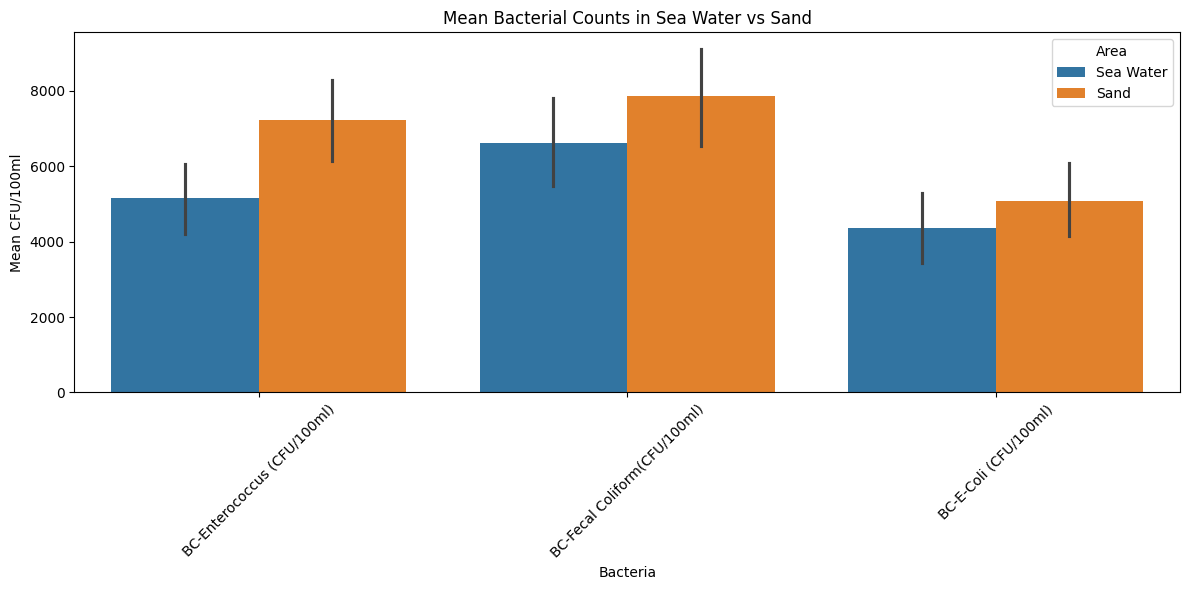

In [ ]:
# melt the dataframe
melted_df = df.melt(id_vars=['Site', 'Area'],
                    value_vars=['BC-Enterococcus (CFU/100ml)',
                               'BC-Fecal Coliform(CFU/100ml)',
                               'BC-E-Coli (CFU/100ml)'],
                    var_name='Bacteria',
                    value_name='Count')

# Plot total counts by area and bacteria type
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Bacteria', y='Count', hue='Area', estimator=np.mean)
plt.title('Mean Bacterial Counts in Sea Water vs Sand')
plt.ylabel('Mean CFU/100ml')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Boxplots for bacterial distribution by site and area

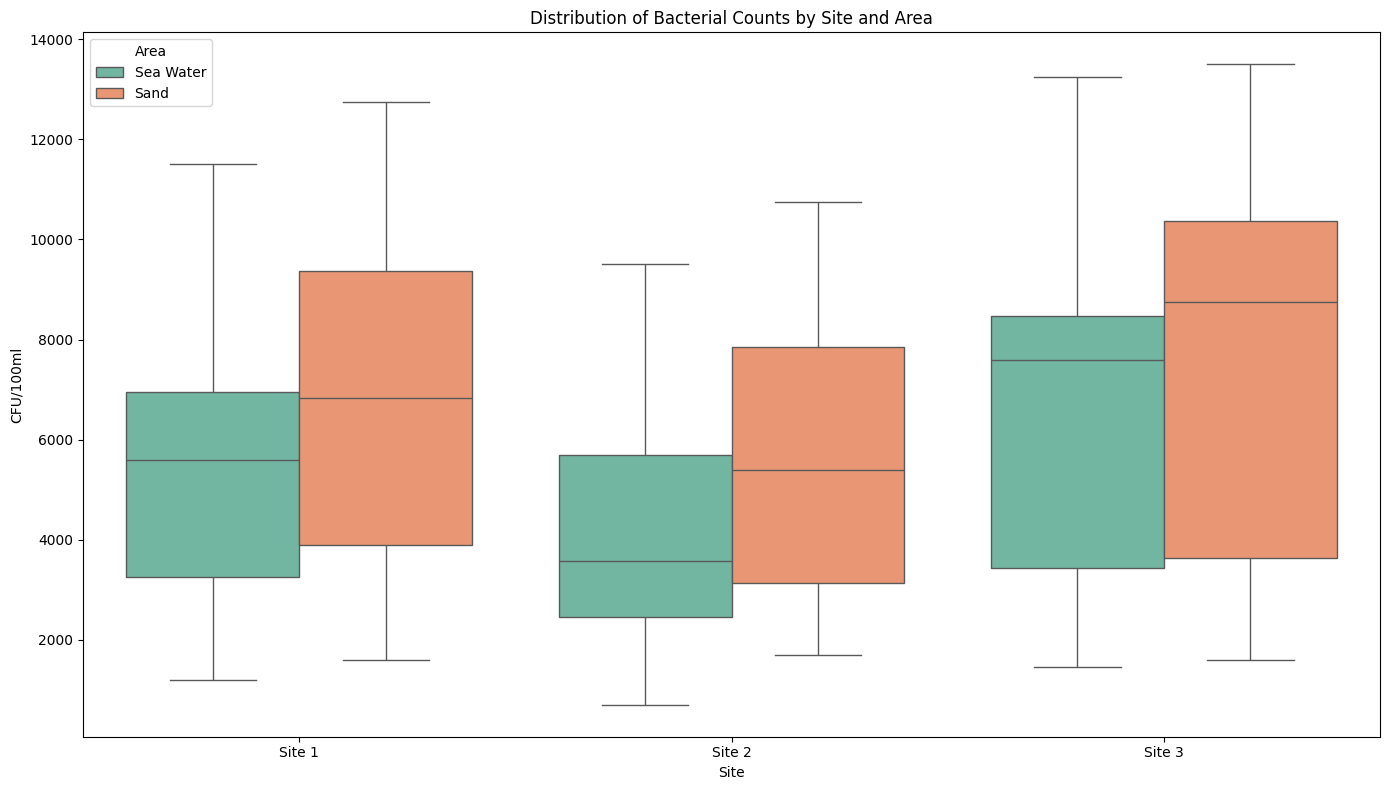

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_df, x='Site', y='Count', hue='Area', palette='Set2')
plt.title('Distribution of Bacterial Counts by Site and Area')
plt.ylabel('CFU/100ml')
plt.tight_layout()
plt.show()

###Physical parameters visualization

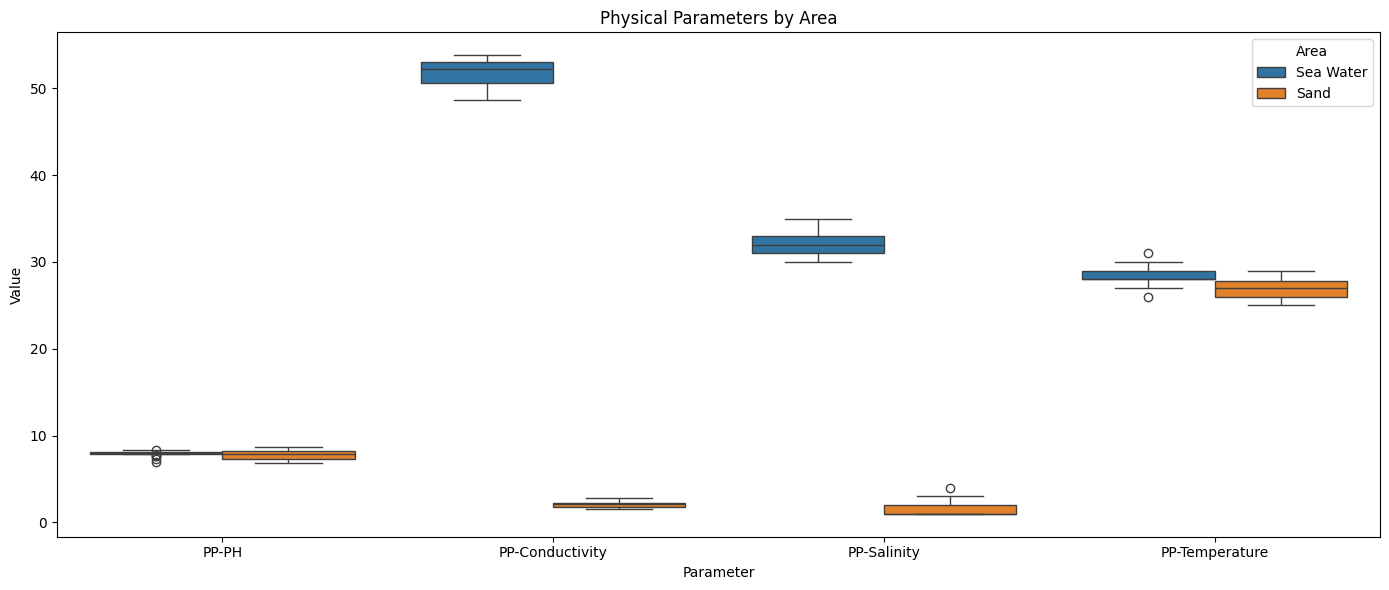

In [ ]:
# melt data
pp_melted = df.melt(id_vars=['Site', 'Area'],
                    value_vars=['PP-PH', 'PP-Conductivity',
                               'PP-Salinity', 'PP-Temperature'],
                    var_name='Parameter',
                    value_name='Value')

# Plot physical parameters
plt.figure(figsize=(14, 6))
sns.boxplot(data=pp_melted, x='Parameter', y='Value', hue='Area')
plt.title('Physical Parameters by Area')
plt.tight_layout()
plt.show()